<a href="https://colab.research.google.com/github/pranavchandran/Begintocodewithpython.github.io/blob/master/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [7]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [8]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0]*d
numbers_of_rewards_0 = [0]*d
total_reward = 0
for n in range(0,N):
  ad = 0
  max_random = 0
  for i in range(0,d):
    random_beta = random.betavariate(numbers_of_rewards_1[i]+1,numbers_of_rewards_0[i]+1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n,ad]
  if reward == 1:
    numbers_of_rewards_1[ad] += 1
  else:
    numbers_of_rewards_0[ad] += 1
  total_reward = total_reward + reward

    


Streaming output truncated to the last 5000 lines.
0
1
0
1
2
0
1
3
0
3
8
0
2
0
2
8
0
4
0
3
4
5
7
0
1
5
6
0
3
0
1
3
8
0
1
3
6
0
1
0
1
4
0
2
0
2
5
0
1
3
4
0
1
0
1
4
7
9
0
9
0
3
6
0
1
7
8
0
0
1
0
1
7
9
0
1
0
1
2
3
7
0
1
2
3
0
3
0
1
5
0
2
0
1
2
4
7
0
1
0
2
0
1
0
0
9
0
1
3
4
7
0
3
0
1
0
2
0
1
0
1
2
0
1
6
0
1
3
4
0
1
0
0
1
9
0
3
0
3
5
0
3
4
0
1
2
6
9
0
2
8
0
1
8
0
3
0
2
4
0
1
3
0
1
4
7
0
0
1
3
0
1
0
2
3
9
0
1
4
7
0
0
1
0
1
2
5
0
1
2
9
0
0
5
0
1
9
0
0
7
0
1
4
0
0
3
0
3
5
6
0
6
0
1
2
0
4
5
7
0
1
0
1
8
0
1
2
0
1
3
0
1
3
0
0
2
0
5
0
0
2
3
8
0
4
0
4
0
3
5
0
0
3
5
7
0
4
0
1
2
3
9
0
0
1
3
0
3
0
1
5
0
0
1
7
9
0
0
0
1
4
5
0
2
5
0
1
2
6
0
2
0
7
0
1
2
6
0
1
7
0
1
0
3
4
7
0
6
0
3
0
1
3
7
0
1
8
0
1
6
8
0
1
2
4
0
1
3
6
0
6
0
1
3
0
6
0
0
0
8
0
3
4
6
7
0
1
0
1
4
6
7
9
0
2
9
0
1
3
0
1
2
3
7
0
1
3
0
1
2
7
0
1
0
2
5
9
0
3
4
5
0
1
0
1
0
3
0
1
2
3
6
0
0
0
1
2
5
0
1
3
9
0
3
7
0
1
2
6
0
1
0
2
0
1
2
3
0
1
3
0
0
1
2
3
0
5
8
0
1
4
5
0
1
3
9
0
0
1
2
3
0
1
3
0
2
0
1
2
3
7
0
2
5
0
1
0
5
0
1
3
5
0
2
0
3
5
0
2
6
9
0
5
0
1

## Visualising the results - Histogram

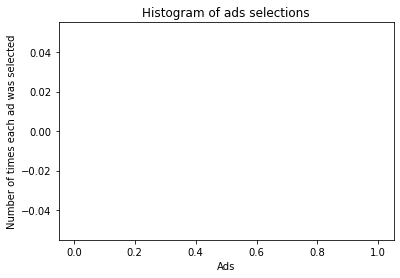

In [9]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()